# TITANIC DATA SET


## Rodrigo Rojas Uriostigue

Sobre este archivo
El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic —considerado ampliamente como "insumergible"— se hundió tras chocar con un iceberg. Lamentablemente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de las 2224 personas entre pasajeros y tripulación.

Aunque hubo un cierto grado de suerte en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, se te pide construir un modelo predictivo que responda a la pregunta: "¿Qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de los pasajeros (es decir, nombre, edad, género, clase socioeconómica, etc.)

![](nationalgeographic762774.jpg)

In [1]:
import pandas as pd 
pd.set_option("display.max_columns",30)
pd.set_option("display.max_rows",30)
import matplotlib.pyplot as plt 
%matplotlib inline

import cufflinks as cf 
cf.go_offline()
import numpy as np
import seaborn as sns

### imputacion variables continuas
from sklearn.impute import SimpleImputer
from scipy.stats import ks_2samp



from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score,StratifiedKFold,train_test_split,GridSearchCV

In [2]:
train_df= pd.read_csv("datasets/titanic.csv")
test_df= pd.read_csv("datasets/titanic.csv")

In [3]:
train_df.head(50)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,1.0,0.0,"Butt, Major. Archibald Willingham",male,45.0000,0.0,0.0,113050,26.5500,B38,S,NaN,NaN,"Washington, DC"
46,1.0,0.0,"Cairns, Mr. Alexander",male,NaN,0.0,0.0,113798,31.0000,NaN,S,NaN,NaN,NaN
47,1.0,1.0,"Calderhead, Mr. Edward Pennington",male,42.0000,0.0,0.0,PC 17476,26.2875,E24,S,5,NaN,"New York, NY"
48,1.0,1.0,"Candee, Mrs. Edward (Helen Churchill Hungerford)",female,53.0000,0.0,0.0,PC 17606,27.4458,NaN,C,6,NaN,"Washington, DC"


In [4]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [5]:
train_df = train_df.drop(['boat', 'body'], axis=1)


In [6]:
train_df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
train_df.describe(include=["O"])

,name,sex,ticket,cabin,embarked,home.dest
count,1309,1309,1309,295,1307,745
unique,1307,2,929,186,3,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,"New York, NY"
freq,2,843,11,6,914,64


In [8]:
train_df.groupby(['pclass'],as_index = False)['survived'].mean()

,pclass,survived
0,1.0,0.619195
1,2.0,0.429603
2,3.0,0.255289


### Podemos ver que aquellos pasajeros que estaban en la clase 1 tiene mas probabilidad de vivir

In [9]:
train_df.groupby(['sex'],as_index = False)['survived'].mean()

,sex,survived
0,female,0.727468
1,male,0.190985


### Podemos ver que las mujeres tenían mas probabilidad de sobrevivir,pues el 72% de ellas se salvaron y solo un 19% de los hombres sobrevivieron

In [10]:
train_df.groupby(['sibsp'],as_index = False)['survived'].mean()

,sibsp,survived
0,0.0,0.346801
1,1.0,0.510972
2,2.0,0.452381
3,3.0,0.300000
4,4.0,0.136364
5,5.0,0.000000
6,8.0,0.000000


### Esta columna indica cuántos familiares cercanos (hermanos o pareja) viajaban junto con esa persona.




In [11]:
train_df.groupby(['parch'],as_index = False)['survived'].mean()

,parch,survived
0,0.0,0.335329
1,1.0,0.588235
2,2.0,0.504425
3,3.0,0.625000
4,4.0,0.166667
5,5.0,0.166667
6,6.0,0.000000
7,9.0,0.000000


###  Tenemos que Parch = Número de padres/madres o hijos/as a bordo del Titanic



In [12]:
train_df['Family_Size'] = train_df['sibsp'] + train_df['parch'] + 1
test_df['Family_Size'] = test_df['sibsp'] + test_df['parch'] + 1



### Agregamos una columna que nos indica el tamaño de la familia de la persona

In [13]:
train_df.groupby(['Family_Size'],as_index = False)['survived'].mean()

,Family_Size,survived
0,1.0,0.302532
1,2.0,0.536170
2,3.0,0.566038
3,4.0,0.697674
4,5.0,0.272727
5,6.0,0.200000
6,7.0,0.250000
7,8.0,0.000000
8,11.0,0.000000


In [14]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
train_df['Family_Size_Grouped'] = train_df['Family_Size'].map(family_map)
test_df['Family_Size_Grouped'] = train_df['Family_Size'].map(family_map)


In [15]:
train_df.groupby(['Family_Size_Grouped'],as_index = False)['survived'].mean()

,Family_Size_Grouped,survived
0,Alone,0.302532
1,Large,0.114286
2,Medium,0.234043
3,Small,0.562929


In [16]:
train_df.groupby(['embarked'],as_index = False)['survived'].mean


<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000284E717C9A0>>

### Utilizaremos la columna embarked para tener la media de gente que sobrevivió dependiendo de donde se hayan subido

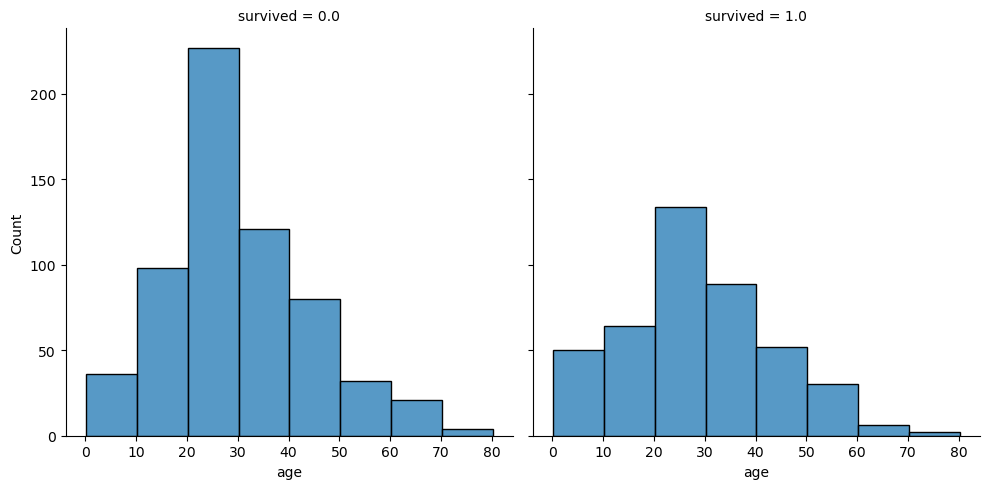

In [17]:
sns.displot(train_df, x = 'age', col = 'survived', binwidth = 10,height = 5)

In [18]:
train_df["Age_cut"] = pd.qcut(train_df["age"],5)
test_df["Age_cut"] = pd.qcut(test_df["age"],5)

In [19]:
train_df.groupby(['Age_cut'],as_index = False)['survived'].mean()

,Age_cut,survived
0,"(0.166, 19.0]",0.471111
1,"(19.0, 25.0]",0.376147
2,"(25.0, 31.0]",0.376963
3,"(31.0, 42.0]",0.391705
4,"(42.0, 80.0]",0.420513


### Podemos ver que el promedio de sobrevivientes,la mayoría tenía entre 0 y 24 añós


In [20]:
train_df.loc[train_df['age'] <= 19, 'age'] = 0
train_df.loc[(train_df['age'] > 19) & (train_df['age'] <= 25), 'age'] = 1
train_df.loc[(train_df['age'] > 25) & (train_df['age'] <= 31), 'age'] = 2
train_df.loc[(train_df['age'] > 31) & (train_df['age'] <= 42), 'age'] = 3
train_df.loc[(train_df['age'] > 42) & (train_df['age'] <= 80), 'age'] = 4
train_df.loc[train_df['age'] > 80, 'age']

test_df.loc[test_df['age'] <= 19, 'age'] = 0
test_df.loc[(test_df['age'] > 19) & (test_df['age'] <= 25), 'age'] = 1
test_df.loc[(test_df['age'] > 25) & (test_df['age'] <= 31), 'age'] = 2
test_df.loc[(test_df['age'] > 31) & (test_df['age'] <= 42), 'age'] = 3
test_df.loc[(test_df['age'] > 42) & (test_df['age'] <= 80), 'age'] = 4
test_df.loc[test_df['age'] > 80, 'age']


Series([], Name: age, dtype: float64)

In [21]:
train_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,Family_Size,Family_Size_Grouped,Age_cut
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,2.0,0.0,0.0,24160,211.3375,B5,S,"St Louis, MO",1.0,Alone,"(25.0, 31.0]"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.0,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",4.0,Small,"(0.166, 19.0]"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,0.0,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",4.0,Small,"(0.166, 19.0]"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,2.0,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",4.0,Small,"(25.0, 31.0]"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1.0,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",4.0,Small,"(19.0, 25.0]"


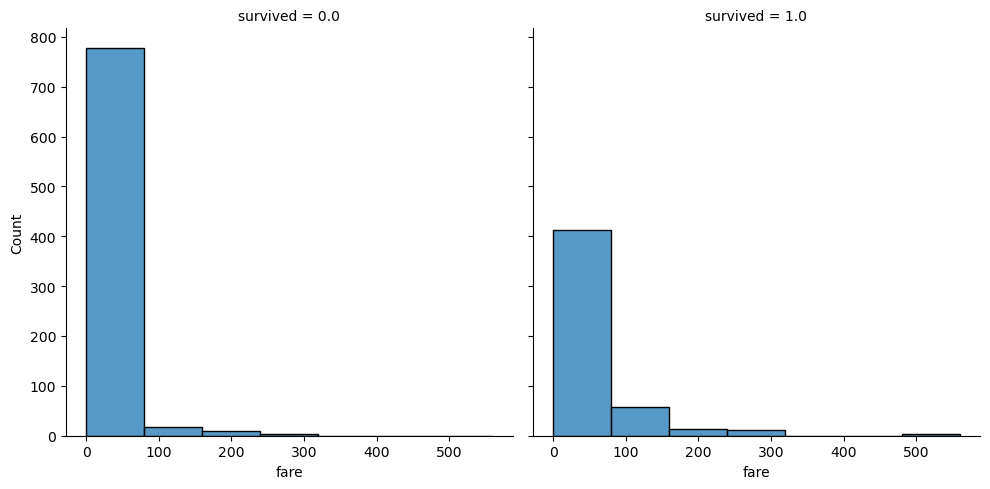

In [22]:
sns.displot(train_df, x= 'fare',col = 'survived',binwidth = 80,height = 5)

In [23]:
train_df["Fare_cut"] = pd.qcut(train_df["fare"],5)
test_df["Fare_cut"] = pd.qcut(test_df["fare"],5)

In [24]:
train_df.groupby(['Fare_cut'],as_index = False)['survived'].mean()

,Fare_cut,survived
0,"(-0.001, 7.854]",0.258182
1,"(7.854, 10.5]",0.200787
2,"(10.5, 21.679]",0.379845
3,"(21.679, 41.579]",0.458015
4,"(41.579, 512.329]",0.617761


In [25]:
# Nuevos intervalos para 'fare' según la imagen
train_df.loc[train_df['fare'] <= 7.854, 'fare'] = 0
train_df.loc[(train_df['fare'] > 7.854) & (train_df['fare'] <= 10.5), 'fare'] = 1
train_df.loc[(train_df['fare'] > 10.5) & (train_df['fare'] <= 21.679), 'fare'] = 2
train_df.loc[(train_df['fare'] > 21.679) & (train_df['fare'] <= 41.579), 'fare'] = 3
train_df.loc[(train_df['fare'] > 41.579) & (train_df['fare'] <= 512.329), 'fare'] = 4
train_df.loc[train_df['fare'] > 512.329, 'fare'] 


test_df.loc[test_df['fare'] <= 7.854, 'fare'] = 0
test_df.loc[(test_df['fare'] > 7.854) & (test_df['fare'] <= 10.5), 'fare'] = 1
test_df.loc[(test_df['fare'] > 10.5) & (test_df['fare'] <= 21.679), 'fare'] = 2
test_df.loc[(test_df['fare'] > 21.679) & (test_df['fare'] <= 41.579), 'fare'] = 3
test_df.loc[(test_df['fare'] > 41.579) & (test_df['fare'] <= 512.329), 'fare'] = 4
test_df.loc[test_df['fare'] > 512.329, 'fare'] 


49     512.3292
50     512.3292
183    512.3292
302    512.3292
Name: fare, dtype: float64

In [26]:
train_df['name']

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
1309                                                NaN
Name: name, Length: 1310, dtype: object

In [27]:
train_df['Title'] = train_df['name'].str.split(",", expand=True)[1] \
    .str.split(".", expand=True)[0] \
    .apply(lambda x: x.strip() if isinstance(x, str) else x)

test_df['Title'] = test_df['name'].str.split(",", expand=True)[1] \
    .str.split(".", expand=True)[0] \
    .apply(lambda x: x.strip() if isinstance(x, str) else x)


In [28]:
train_df.groupby(['Title'],as_index = False)['survived'].mean()

,Title,survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dona,1.000000
4,Dr,0.500000
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.508197
9,Miss,0.676923


In [29]:
train_df['Title'] = train_df['Title'].replace({ 
    'Capt':'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir':'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'


})


test_df['Title'] = test_df['Title'].replace({ 
    'Capt':'Military',
    'Col':  'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir':'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'


})

In [30]:
train_df.groupby(['Title'],as_index = False)['survived'].agg(['count','mean'])

,count,mean
Title,,
Dona,1,1.000000
Dr,8,0.500000
Master,61,0.508197
Military,7,0.428571
Miss,260,0.676923
Mr,757,0.162483
Mrs,197,0.786802
Noble,10,0.700000
Rev,8,0.000000


In [31]:
train_df['Name_Length'] = train_df['name'].apply(lambda x: len(x) if isinstance(x, str) else 0)
test_df['Name_Length'] = test_df['name'].apply(lambda x: len(x) if isinstance(x, str) else 0)


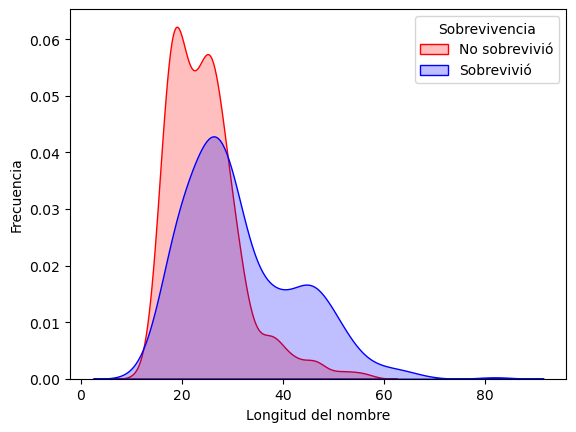

In [32]:
import seaborn as sns

g = sns.kdeplot(train_df['Name_Length'][(train_df['survived'] == 0) & (train_df['Name_Length'].notnull())],
                color='Red', fill=True)
g = sns.kdeplot(train_df['Name_Length'][(train_df['survived'] == 1) & (train_df['Name_Length'].notnull())],
                ax=g, color='Blue', fill=True)
g.set_xlabel("Longitud del nombre")
g.set_ylabel("Frecuencia")
g.legend(['No sobrevivió', 'Sobrevivió'], title='Sobrevivencia')


In [33]:
train_df["Name_LengthGB"] = pd.qcut(train_df["Name_Length"],3)
test_df["Name_LengthGB"] = pd.qcut(test_df["Name_Length"],3)

In [34]:
train_df.groupby(['Name_LengthGB'],as_index = False)['survived'].mean()


,Name_LengthGB,survived
0,"(-0.001, 22.0]",0.235669
1,"(22.0, 28.0]",0.331719
2,"(28.0, 82.0]",0.592941


In [35]:
train_df.loc[train_df['Name_Length'] <= 22, 'Name_Size'] = 0
train_df.loc[(train_df['Name_Length'] > 22) & (train_df['Name_Length'] <= 28), 'Name_Size'] = 1
train_df.loc[(train_df['Name_Length'] > 28) & (train_df['Name_Length'] <= 82), 'Name_Size'] = 2
train_df.loc[train_df['Name_Length'] > 82, 'Name_Size'] 

test_df.loc[test_df['Name_Length'] <= 22, 'Name_Size'] = 0
test_df.loc[(test_df['Name_Length'] > 22) & (test_df['Name_Length'] <= 28), 'Name_Size'] = 1
test_df.loc[(test_df['Name_Length'] > 28) & (test_df['Name_Length'] <= 82), 'Name_Size'] = 2
test_df.loc[test_df['Name_Length'] > 82, 'Name_Size']

Series([], Name: Name_Size, dtype: float64)

In [36]:
train_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,Family_Size,Family_Size_Grouped,Age_cut,Fare_cut,Title,Name_Length,Name_LengthGB,Name_Size
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,2.0,0.0,0.0,24160,4.0,B5,S,"St Louis, MO",1.0,Alone,"(25.0, 31.0]","(41.579, 512.329]",Miss,29,"(28.0, 82.0]",2.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.0,1.0,2.0,113781,4.0,C22 C26,S,"Montreal, PQ / Chesterville, ON",4.0,Small,"(0.166, 19.0]","(41.579, 512.329]",Master,30,"(28.0, 82.0]",2.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,0.0,1.0,2.0,113781,4.0,C22 C26,S,"Montreal, PQ / Chesterville, ON",4.0,Small,"(0.166, 19.0]","(41.579, 512.329]",Miss,28,"(22.0, 28.0]",1.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,2.0,1.0,2.0,113781,4.0,C22 C26,S,"Montreal, PQ / Chesterville, ON",4.0,Small,"(25.0, 31.0]","(41.579, 512.329]",Mr,36,"(28.0, 82.0]",2.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1.0,1.0,2.0,113781,4.0,C22 C26,S,"Montreal, PQ / Chesterville, ON",4.0,Small,"(19.0, 25.0]","(41.579, 512.329]",Mrs,47,"(28.0, 82.0]",2.0


In [37]:
train_df['ticket']

0        24160
1       113781
2       113781
3       113781
4       113781
         ...  
1305      2665
1306      2656
1307      2670
1308    315082
1309       NaN
Name: ticket, Length: 1310, dtype: object

In [38]:
train_df['TicketNumber'] = train_df['ticket'].apply(lambda x: x.split()[-1] if isinstance(x, str) else x)
test_df['TicketNumber'] = test_df['ticket'].apply(lambda x: x.split()[-1] if isinstance(x, str) else x)


In [39]:
train_df.groupby(['TicketNumber'],as_index = False)['survived'].agg(['count','mean']).sort_values('count',ascending = False)

,count,mean
TicketNumber,,
2343,11,0.000000
1601,8,0.750000
2144,8,0.000000
3101295,7,0.000000
17608,7,0.857143
...,...,...
29566,1,0.000000
11774,1,1.000000
29751,1,0.000000


In [40]:
train_df.groupby('TicketNumber')['TicketNumber'].transform('count')

0       4.0
1       6.0
2       6.0
3       6.0
4       6.0
       ... 
1305    2.0
1306    1.0
1307    1.0
1308    1.0
1309    NaN
Name: TicketNumber, Length: 1310, dtype: float64

In [41]:
train_df['TicketNumberCounts'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['TicketNumberCounts'] = test_df.groupby('TicketNumber')['TicketNumber'].transform('count')


In [42]:
train_df.groupby(['TicketNumberCounts'], as_index = False)['survived'].agg(['count','mean']).sort_values('count',ascending=False)

,count,mean
TicketNumberCounts,,
1.0,705,0.268085
2.0,268,0.507463
3.0,147,0.639456
4.0,68,0.676471
5.0,35,0.371429
7.0,35,0.257143
6.0,24,0.291667
8.0,16,0.375000
11.0,11,0.000000


In [43]:
train_df['ticket']

0        24160
1       113781
2       113781
3       113781
4       113781
         ...  
1305      2665
1306      2656
1307      2670
1308    315082
1309       NaN
Name: ticket, Length: 1310, dtype: object

In [44]:
train_df['ticket'].str.split(pat =" ",expand=True)

,0,1,2
0,24160,None,None
1,113781,None,None
2,113781,None,None
3,113781,None,None
4,113781,None,None
...,...,...,...
1305,2665,None,None
1306,2656,None,None
1307,2670,None,None
1308,315082,None,None


In [45]:
train_df['ticket'] = train_df['ticket'].astype(str)


In [46]:
train_df['TicketLocation'] = np.where(
    train_df['ticket'].str.split(pat=" ", expand=True).iloc[:, 1].notna(),
    train_df['ticket'].str.split(pat=" ", expand=True).iloc[:, 0].apply(lambda x: x.strip() if isinstance(x, str) else 'Blank'),
    'Blank'
)


test_df['TicketLocation'] = np.where(
    test_df['ticket'].str.split(pat=" ", expand=True).iloc[:, 1].notna(),
    test_df['ticket'].str.split(pat=" ", expand=True).iloc[:, 0].apply(lambda x: x.strip() if isinstance(x, str) else 'Blank'),
    'Blank'
)

In [47]:
train_df["TicketLocation"].value_counts()

Blank         962
PC             92
C.A.           46
SOTON/O.Q.     16
W./C.          14
             ... 
S.W./PP         1
W/C             1
SCO/W           1
SO/C            1
STON/OQ.        1
Name: TicketLocation, Length: 50, dtype: int64

In [48]:
train_df['TicketLocation'] = train_df['TicketLocation'].replace({
    'SOTON/O.Q.': 'SOTON/OQ',
    'C.A.': 'CA',
    'CA.': 'CA',
    'SC/PARIS': 'SC/Paris',
    'S.C./PARIS': 'SC/Paris',
    'A/4.': 'A/4',
    'A/5.': 'A/5',
    'A.S.': 'A/5',
    'A./5.': 'A/5',
    'W./C.': 'W/C'
})


test_df['TicketLocation'] = test_df['TicketLocation'].replace({
    'SOTON/O.Q.': 'SOTON/OQ',
    'C.A.': 'CA',
    'CA.': 'CA',
    'SC/PARIS': 'SC/Paris',
    'S.C./PARIS': 'SC/Paris',
    'A/4.': 'A/4',
    'A/5.': 'A/5',
    'A.S.': 'A/5',
    'A./5.': 'A/5',
    'W./C.': 'W/C'
})

In [49]:
train_df.groupby(['TicketLocation'], as_index = False)['survived'].agg(['count','mean'])

,count,mean
TicketLocation,,
A.,1,1.000000
A.5.,3,0.000000
A/4,9,0.111111
A/5,25,0.080000
A/S,1,0.000000
...,...,...
STON/OQ.,1,0.000000
SW/PP,1,1.000000
W.E.P.,2,0.500000


In [50]:
train_df['cabin'] =train_df['cabin'].fillna('U')
train_df['cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['cabin']])


test_df['cabin'] =test_df['cabin'].fillna('U')
test_df['cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['cabin']])

In [51]:
train_df.groupby(['cabin'],as_index = False)['survived'].agg(['count','mean'])

,count,mean
cabin,,
A,22,0.500000
B,65,0.723077
C,94,0.606383
D,46,0.695652
E,41,0.731707
F,21,0.619048
G,5,0.600000
T,1,0.000000
U,1014,0.302761


In [52]:
train_df['Cabin_Assigned'] = train_df['cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_df['Cabin_Assigned'] = test_df['cabin'].apply(lambda x: 0 if x in ['U'] else 1)
                                                     


In [53]:
train_df.groupby(['Cabin_Assigned'],as_index = False)['survived'].agg(['count','mean'])

,count,mean
Cabin_Assigned,,
0,1014,0.302761
1,295,0.654237


In [54]:
train_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,Family_Size,Family_Size_Grouped,Age_cut,Fare_cut,Title,Name_Length,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_Assigned
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,2.0,0.0,0.0,24160,4.0,B,S,"St Louis, MO",1.0,Alone,"(25.0, 31.0]","(41.579, 512.329]",Miss,29,"(28.0, 82.0]",2.0,24160,4.0,Blank,1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.0,1.0,2.0,113781,4.0,C,S,"Montreal, PQ / Chesterville, ON",4.0,Small,"(0.166, 19.0]","(41.579, 512.329]",Master,30,"(28.0, 82.0]",2.0,113781,6.0,Blank,1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,0.0,1.0,2.0,113781,4.0,C,S,"Montreal, PQ / Chesterville, ON",4.0,Small,"(0.166, 19.0]","(41.579, 512.329]",Miss,28,"(22.0, 28.0]",1.0,113781,6.0,Blank,1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,2.0,1.0,2.0,113781,4.0,C,S,"Montreal, PQ / Chesterville, ON",4.0,Small,"(25.0, 31.0]","(41.579, 512.329]",Mr,36,"(28.0, 82.0]",2.0,113781,6.0,Blank,1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1.0,1.0,2.0,113781,4.0,C,S,"Montreal, PQ / Chesterville, ON",4.0,Small,"(19.0, 25.0]","(41.579, 512.329]",Mrs,47,"(28.0, 82.0]",2.0,113781,6.0,Blank,1


In [55]:
train_df.shape

(1310, 24)

In [56]:
test_df.shape

(1310, 26)

In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   pclass               1309 non-null   float64 
 1   survived             1309 non-null   float64 
 2   name                 1309 non-null   object  
 3   sex                  1309 non-null   object  
 4   age                  1046 non-null   float64 
 5   sibsp                1309 non-null   float64 
 6   parch                1309 non-null   float64 
 7   ticket               1310 non-null   object  
 8   fare                 1308 non-null   float64 
 9   cabin                1310 non-null   object  
 10  embarked             1307 non-null   object  
 11  home.dest            745 non-null    object  
 12  Family_Size          1309 non-null   float64 
 13  Family_Size_Grouped  1309 non-null   object  
 14  Age_cut              1046 non-null   category
 15  Fare_cut             

In [58]:
train_df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'home.dest', 'Family_Size',
       'Family_Size_Grouped', 'Age_cut', 'Fare_cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Name_Size', 'TicketNumber', 'TicketNumberCounts',
       'TicketLocation', 'Cabin_Assigned'],
      dtype='object')

In [59]:
test_df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'Family_Size',
       'Family_Size_Grouped', 'Age_cut', 'Fare_cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Name_Size', 'TicketNumber', 'TicketNumberCounts',
       'TicketLocation', 'Cabin_Assigned'],
      dtype='object')

In [60]:
test_df = test_df.drop(['boat', 'body'], axis=1)


In [61]:
train_df['age'].fillna(train_df['age'].mean(),inplace =True)
test_df['age'].fillna(test_df['age'].mean(),inplace = True)
test_df['fare'].fillna(test_df['fare'].mean(),inplace = True)

In [62]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

ohe = OneHotEncoder()
ode = OrdinalEncoder()
SI = SimpleImputer(strategy='most_frequent')



In [63]:
ode_cols = ['Family_Size_Grouped']
ohe_cols = ['sex', 'embarked']

<AxesSubplot:>

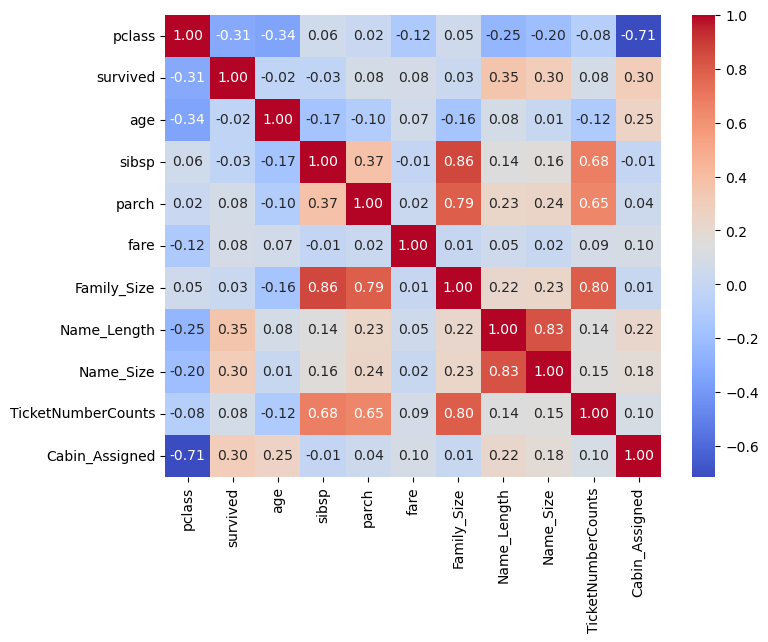

In [64]:
correlation_matrix = train_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")


In [65]:
train_df.isna().sum()


pclass                   1
survived                 1
name                     1
sex                      1
age                      0
sibsp                    1
parch                    1
ticket                   0
fare                     2
cabin                    0
embarked                 3
home.dest              565
Family_Size              1
Family_Size_Grouped      1
Age_cut                264
Fare_cut                 2
Title                    1
Name_Length              0
Name_LengthGB            0
Name_Size                0
TicketNumber             1
TicketNumberCounts       1
TicketLocation           0
Cabin_Assigned           0
dtype: int64

In [66]:
train_df.isna().sum()


pclass                   1
survived                 1
name                     1
sex                      1
age                      0
sibsp                    1
parch                    1
ticket                   0
fare                     2
cabin                    0
embarked                 3
home.dest              565
Family_Size              1
Family_Size_Grouped      1
Age_cut                264
Fare_cut                 2
Title                    1
Name_Length              0
Name_LengthGB            0
Name_Size                0
TicketNumber             1
TicketNumberCounts       1
TicketLocation           0
Cabin_Assigned           0
dtype: int64

In [67]:
train_df.isna().sum()

pclass                   1
survived                 1
name                     1
sex                      1
age                      0
sibsp                    1
parch                    1
ticket                   0
fare                     2
cabin                    0
embarked                 3
home.dest              565
Family_Size              1
Family_Size_Grouped      1
Age_cut                264
Fare_cut                 2
Title                    1
Name_Length              0
Name_LengthGB            0
Name_Size                0
TicketNumber             1
TicketNumberCounts       1
TicketLocation           0
Cabin_Assigned           0
dtype: int64

In [72]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   pclass               1309 non-null   float64 
 1   survived             1309 non-null   float64 
 2   name                 1309 non-null   object  
 3   sex                  1309 non-null   object  
 4   age                  1310 non-null   float64 
 5   sibsp                1309 non-null   float64 
 6   parch                1309 non-null   float64 
 7   ticket               1309 non-null   object  
 8   fare                 1310 non-null   float64 
 9   cabin                1310 non-null   object  
 10  embarked             1307 non-null   object  
 11  home.dest            745 non-null    object  
 12  Family_Size          1309 non-null   float64 
 13  Family_Size_Grouped  1309 non-null   object  
 14  Age_cut              1046 non-null   category
 15  Fare_cut             

In [75]:
X = train_df.drop(['survived', 'sibsp', 'parch'], axis=1)
y = train_df['survived']
X_test = test_df.drop(['Age_cut', 'Fare_cut', 'sibsp', 'parch'], axis=1)

In [76]:
from sklearn.impute import SimpleImputer

# Lista de columnas con valores faltantes que quieres rellenar
columns_with_nan = ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 
                    'fare', 'embarked', 'home.dest', 'Family_Size', 'Family_Size_Grouped', 
                    'Age_cut', 'Fare_cut', 'Title', 'TicketNumber', 'TicketNumberCounts']

# Crear un imputador para valores categóricos o mixtos
imputer = SimpleImputer(strategy='most_frequent')

# Aplicar el imputador a las columnas especificadas
train_df[columns_with_nan] = pd.DataFrame(imputer.fit_transform(train_df[columns_with_nan]), columns=columns_with_nan)

In [86]:
train_df.isna().sum()

pclass                 0
survived               0
name                   0
sex                    0
age                    0
sibsp                  0
parch                  0
ticket                 0
fare                   0
cabin                  0
embarked               0
home.dest              0
Family_Size            0
Family_Size_Grouped    0
Age_cut                0
Fare_cut               0
Title                  0
Name_Length            0
Name_LengthGB          0
Name_Size              0
TicketNumber           0
TicketNumberCounts     0
TicketLocation         0
Cabin_Assigned         0
dtype: int64

In [77]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,stratify=y, random_state=21)

In [78]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [79]:
pip install -U scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [80]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))  # Cambia sparse_output=False por sparse=False
])


In [81]:
from sklearn.compose import ColumnTransformer

col_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
   # ('passthrough', 'passthrough', ['Pclass', 'TicketNumberCounts', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare'])
     ('passthrough', 'passthrough', ['pclass', 'Cabin_Assigned', 'Name_Size', 'age', 'fare', 'TicketNumberCounts'])
    ],
    remainder='drop',
    n_jobs=-1)

In [82]:
rfc = RandomForestClassifier()


In [83]:
param_grid = {
    'n_estimators': [150, 200, 300, 500],
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 13, 15, 17, 20],
    'min_samples_leaf': [2, 4, 5, 6],
    'criterion': ['gini', 'entropy'],
}


In [84]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))


In [88]:
y_train = y_train.astype('float')  # Si quieres mantener los decimales
# o
y_train = y_train.astype('int')  # Si deseas que sea solo 0 y 1


In [89]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                  ['pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'age', 'fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 13, 15, 17, 20],
                                          'min_samples_leaf': [2, 4, 5, 6],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [150, 200, 300,
                                                           500]}))])

In [92]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
0.8081430849851902


In [94]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()


In [95]:
param_grid = {
              'n_estimators' : [300, 400, 500],
              'learning_rate': [ 0.1, 0.3, 0.6, 1.0],
              'max_depth': [8, 10, 12],
              'min_samples_leaf': [50, 100, 120, 150],
              'max_features': [0.1, 0.3, 0.5] 
              }

In [96]:
CV_gbc = GridSearchCV(estimator=GBC, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [97]:
pipefinalgbc= make_pipeline(col_trans, CV_gbc)
pipefinalgbc.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                  ['pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'age', 'fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GradientBoostingClassifier(),
                              param_grid={'learning_rate': [0.1, 0.3, 0.6, 1.0],
                                          'max_depth': [8, 10, 12],
                                          'max_features': [0.1, 0.3, 0.5],
                                          'min_samples_leaf': [50, 100, 120,
                                                               150],
                                          'n_estimators': [300, 400, 500]}))])

In [98]:
print(CV_gbc.best_params_)
print(CV_gbc.best_score_)


{'learning_rate': 0.3, 'max_depth': 12, 'max_features': 0.3, 'min_samples_leaf': 150, 'n_estimators': 500}
0.8186557302346775
